유튜브 인기영상 다운로드 - YouTube Trending Video Dataset (updated daily)

In [148]:
!kaggle datasets download -d rsrishav/youtube-trending-video-dataset

youtube-trending-video-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


파일을 압축 해제하기

In [149]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('C:/workspace/kaggle_youtube_hot/youtube-trending-video-dataset.zip')
fantasy_zip.extractall('C:/workspace/kaggle_youtube_hot/youtube-trending-video-dataset/')
 
fantasy_zip.close()

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import timedelta

data = pd.read_csv('C:/workspace/kaggle_youtube_hot/youtube-trending-video-dataset/KR_youtube_trending_data.csv')
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [151]:
df = data[:]

category_id와 json 파일을 사용하여 텍스트로 된 category 열을 생성합니다.

In [152]:
id_to_category = {}

with open("C:/workspace/kaggle_youtube_hot/youtube-trending-video-dataset/KR_category_id.json","r") as f:
    id_data = json.load(f)
    for category in id_data["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]

# id_to_category

df["categoryId"] = df["categoryId"].astype(str)
df.insert(4, "category", df["categoryId"].map(id_to_category))

categoryId가 29번인 영상을 직접 찾아 확인해보니 카테고리가 "비영리/사회운동"이네요.  
category의 결측치를 "Nonprofits & Activism" 으로 채워줍니다.

In [153]:
df["category"].loc[df["category"].isnull() == True] = "Nonprofits & Activism"

C:\Users\bigdata\AppData\Local\Temp\ipykernel_24080\2824784033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"].loc[df["category"].isnull() == True] = "Nonprofits & Activism"


In [154]:
df["trending_date"] = df["trending_date"].str[0:10]
df["publishedAt"] = df["publishedAt"].str[0:19]
df["trending_date"] = pd.to_datetime(df["trending_date"])
df["publishedAt"] = pd.to_datetime(df["publishedAt"])

In [155]:
df["tag_count"] = df["tags"].apply(lambda x : len(x.split("|")) if x != "[none]" else 0)

In [156]:
df["likes/view_count"] = df["likes"] / df["view_count"]
df["dislikes/view_count"] = df["dislikes"] / df["view_count"]
df["comment_count/view_count"] = df["comment_count"] / df["view_count"]
df["dislikes/likes"] = df["dislikes"] / df["likes"]
df["dislikes/likes"].loc[df["dislikes/likes"] == np.inf] = 0

C:\Users\bigdata\AppData\Local\Temp\ipykernel_24080\3961959139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dislikes/likes"].loc[df["dislikes/likes"] == np.inf] = 0


In [157]:
df.isnull().sum()

video_id                       0
title                          0
publishedAt                    0
channelId                      0
category                       0
channelTitle                   0
categoryId                     0
trending_date                  0
tags                           0
view_count                     0
likes                          0
dislikes                       0
comment_count                  0
thumbnail_link                 0
comments_disabled              0
ratings_disabled               0
description                 3735
tag_count                      0
likes/view_count               7
dislikes/view_count            7
comment_count/view_count       7
dislikes/likes              2304
dtype: int64

결측값을 0으로 대체합니다.

In [158]:
df["dislikes/likes"].loc[df["dislikes/likes"].isnull() == True] = 0

C:\Users\bigdata\AppData\Local\Temp\ipykernel_24080\1258835548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dislikes/likes"].loc[df["dislikes/likes"].isnull() == True] = 0


title의 길이로 title_lenght 열을 생성했습니다.

In [159]:
df["title_length"] = df["title"].apply(lambda x : len(str(x)) if pd.isnull(x) == False  else 0 )

treTime-pubTime  
동영상 게시 후 얼마 후에 인기동영상에 갔는지를 의미하는 treTime-pubTime입니다.


In [160]:
df["treTime-pubTime"] = df["trending_date"] - df["publishedAt"] + timedelta(days = 1)

In [161]:
jintian = input("날짜를 입력하세요( 날짜형식 ex)2022-08-30 ) : ")

In [162]:
df = df[df["trending_date"]=="2022-08-28"]

In [163]:
df

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,comments_disabled,ratings_disabled,description,tag_count,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes,title_length,treTime-pubTime
146954,GOh-qDEN5jU,Resumen de Rayo Vallecano vs RCD Mallorca (0-2),2022-08-27 20:58:01,UCTv-XvfzLX3i4IGWAm4sbmA,Sports,LaLiga Santander,17,2022-08-28,liga|laliga|laliga santander|football|resumen|...,391028,...,False,False,El RCD Mallorca se impone al Rayo Vallecano a ...,48,0.013193,0.0,0.001210,0.0,47,1 days 03:01:59
146955,7bs9-VU8uHI,커피 좀 타 드릴까요?,2022-08-27 06:45:28,UCXEKwWflysXu312NmIP_dlw,Comedy,너덜트,23,2022-08-28,미생|회사|직장상사|신입사원|꼰대|복수|커피|탕비실|코믹숏무비,1199370,...,False,False,#코믹미들무비 #nerdult #소심한복수복수를 꿈꾸는 신입 사원의 고군분투신입사원...,9,0.021213,0.0,0.001137,0.0,12,1 days 17:14:32
146956,k6jqx9kZgPM,TWICE Talk that Talk M/V,2022-08-26 04:00:11,UCaO6TYtlC8U5ttz62hTrZgg,Music,JYP Entertainment,10,2022-08-28,JYP Entertainment|JYP|TWICE|트와이스|트와이스11TH MINI...,30001360,...,False,False,TWICE Talk that Talk M/VTWICE 11TH MINI ALBUM ...,42,0.062900,0.0,0.026663,0.0,24,2 days 19:59:49
146957,X5wT2-odw34,"[ENG SUB] 방송이 낳은 괴물, 이제부터 차쥐뿔은 제 겁니다😎 [차린건 쥐...",2022-08-26 10:00:21,UChdqwmHLPoL3UJmm9Fw-LsA,People & Blogs,차린건 쥐뿔도 없지만,22,2022-08-28,이영지|차린건쥐뿔도없지만|seventeen|hoshi|영지|lee youngji|e...,3580554,...,False,False,🔥 차린건 쥐뿔도 없지만 아홉 번째 추앙 대상🔥블링블링 ✨𝑺𝑯𝑰𝑵𝒆𝒆✨의💙만능 열쇠...,89,0.040665,0.0,0.001670,0.0,67,2 days 13:59:39
146958,he0KEFFhvvA,강남 프랜차이즈 속에서 30년 살아남은 맛집 | 또간집 EP.10,2022-08-26 09:28:13,UC4ZA57iJrf73bJlApKFeLRw,Entertainment,재밌는 거 올라온다,24,2022-08-28,또간집|재밌|재밌는거올라온다|풍자|픙자|퐁자|맛집|맛집프로그램|먹방|재밌는거없나|뭐...,1362702,...,False,False,#풍자 #또간집 #먹방또간집 11화 (9월 9일 6시 30분) 재밌는 거 올라온다[...,18,0.016870,0.0,0.000826,0.0,36,2 days 14:31:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147149,9e0ofowtCjM,LA에서도 회원 간 티칭 금지...?,2022-08-11 09:01:13,UCoe-0EVDJnjlSoPK8ygcGwQ,Sports,김종국 GYM JONG KOOK,17,2022-08-28,김종국|짐종국|런닝맨|미우새|헬스|운동|유재석|하하|이광수|송지효|스포츠|김동현|UFC,1993276,...,False,False,LA.. LA 노래를 하더니.. ㅎ 3년 만에 결국 갔습니다 ㅋ미국 콘서트를 빙자 ...,13,0.018658,0.0,0.001273,0.0,20,17 days 14:58:47
147150,vDC-3LdgQIM,Meenoi's Yorizori Season3 | EP.14 KIM GO EUN,2022-08-12 11:00:38,UCW5gbSGTGIukUDsPt2sdhGw,Music,AOMGOFFICIAL,10,2022-08-28,[None],2784264,...,False,False,🍓 미노이의 요리조리 시즌3✨ 요리조리를 찾아온 고은 아씨#미노이 #김고은 #미노...,1,0.025004,0.0,0.001187,0.0,44,16 days 12:59:22
147151,LjNKUy4hr5c,[릴레이댄스] NewJeans(뉴진스) - Attention (4K),2022-08-13 05:00:12,UCTQVIXvcHrR9jYoJ6qaBAow,Entertainment,M2,24,2022-08-28,CJ100|Dance|K-Pop|Kpop|K팝|Live|M2|MPD|Mnet|New...,2186622,...,False,False,[릴레이댄스] 뉴진스 - 어텐션[Relay Dance] NewJeans - Atte...,47,0.047190,0.0,0.001131,0.0,38,15 days 18:59:48
147152,cJigPNx7d_c,[ASMR] 생로병사의 비밀 - 야식의 유혹,2022-08-16 13:00:31,UCPZ4e8BQEM-BlepSeZUESSw,People & Blogs,강유미 yumi kang좋아서 하는 채널,22,2022-08-28,[None],733660,...,False,False,NaN,1,0.027376,0.0,0.003772,0.0,24,12 days 10:59:29


제목

In [164]:
df2 = df[['title','view_count']]

In [165]:
df_sorted = df2.sort_values(by="view_count", ascending=False).drop_duplicates(['title'], keep="first")
df_sorted

,title,view_count
146975,IVE 아이브 'After LIKE' MV,66087411
147092,THE BOYZ(더보이즈) ‘WHISPER’ MV,35536287
146956,TWICE Talk that Talk M/V,30001360
147109,(MV)온앤오프 (ONF)_Your Song,22442048
146985,BLACKPINK - ‘Pink Venom’ SPECIAL STAGE,15141132
...,...,...
147076,2022 챔피언스 스킨 공개 트레일러 //2022 VCT - 발로란트,114962
146961,하루가 지나도 절대 불지 않는 잡채 만들기,110274
146973,내가 동남아 여행을 자주하는 이유..? 슴슴하지만 심심할 틈 없는 라오스 비엔티안 (2),104754
147070,[주넥추] EP.1 나만 몰라 회사 일은! I 넥슨X이스타 K리그 중계 I 피파온라인4,88988


In [166]:
df_hot = df_sorted
df_hot

,title,view_count
146975,IVE 아이브 'After LIKE' MV,66087411
147092,THE BOYZ(더보이즈) ‘WHISPER’ MV,35536287
146956,TWICE Talk that Talk M/V,30001360
147109,(MV)온앤오프 (ONF)_Your Song,22442048
146985,BLACKPINK - ‘Pink Venom’ SPECIAL STAGE,15141132
...,...,...
147076,2022 챔피언스 스킨 공개 트레일러 //2022 VCT - 발로란트,114962
146961,하루가 지나도 절대 불지 않는 잡채 만들기,110274
146973,내가 동남아 여행을 자주하는 이유..? 슴슴하지만 심심할 틈 없는 라오스 비엔티안 (2),104754
147070,[주넥추] EP.1 나만 몰라 회사 일은! I 넥슨X이스타 K리그 중계 I 피파온라인4,88988


In [167]:
df_hot['title'].values

array(["IVE 아이브 'After LIKE' MV", 'THE BOYZ(더보이즈) ‘WHISPER’ MV',
       'TWICE Talk that Talk M/V', '(MV)온앤오프 (ONF)_Your Song',
       'BLACKPINK - ‘Pink Venom’ SPECIAL STAGE',
       '[ENG SUB] 비폭력🤜🏻🚫주당 채씨, 그게 되나 적당히 술 마시는 게😏  [차린건 쥐뿔도 없지만] EP.07 #이영지 #몬스타엑스형원',
       '서울 도심서 납치극‥20대 남성 가까스로 탈출 (2022.08.15/뉴스투데이/MBC)',
       'British High Schoolers Try Korean Beef + Ramyeon Combo for the first time!!',
       "NewJeans (뉴진스) 'Hype Boy' Official MV (Performance ver.1)",
       '[ENG SUB] 금쪽같은 울 언니👶🏻 서른하나지만 열두 살입니다,,💗  [차린건 쥐뿔도 없지만] EP.08 #이영지 #현아',
       'Brawl Stars: Brawl Talk - 2 New Brawlers, Gears discount, and Plans for the Future!',
       'British High Schoolers try 11 types of Korean Fried Chicken!!',
       "NewJeans (뉴진스) 'Hype Boy' Special Performance Video",
       "FOREVER 1 - GIRLS' GENERATION [Music Bank] | KBS WORLD TV 220819",
       'What a wonderFlip 🎉 당신을 가장 원더한 순간으로⏰',
       'British High Schoolers try REAL Korean Street Toast in Korea!',
       '제일 싼 집', "IVE

In [168]:
import re
df_hot['title_refined'] = df_hot['title'].apply(lambda x: re.sub('[^가-힣\s]', '', x))
df_hot

,title,view_count,title_refined
146975,IVE 아이브 'After LIKE' MV,66087411,아이브
147092,THE BOYZ(더보이즈) ‘WHISPER’ MV,35536287,더보이즈
146956,TWICE Talk that Talk M/V,30001360,
147109,(MV)온앤오프 (ONF)_Your Song,22442048,온앤오프
146985,BLACKPINK - ‘Pink Venom’ SPECIAL STAGE,15141132,
...,...,...,...
147076,2022 챔피언스 스킨 공개 트레일러 //2022 VCT - 발로란트,114962,챔피언스 스킨 공개 트레일러 발로란트
146961,하루가 지나도 절대 불지 않는 잡채 만들기,110274,하루가 지나도 절대 불지 않는 잡채 만들기
146973,내가 동남아 여행을 자주하는 이유..? 슴슴하지만 심심할 틈 없는 라오스 비엔티안 (2),104754,내가 동남아 여행을 자주하는 이유 슴슴하지만 심심할 틈 없는 라오스 비엔티안
147070,[주넥추] EP.1 나만 몰라 회사 일은! I 넥슨X이스타 K리그 중계 I 피파온라인4,88988,주넥추 나만 몰라 회사 일은 넥슨이스타 리그 중계 피파온라인


In [169]:
df_hot = df_hot[df_hot['title_refined'].apply(lambda x: re.sub('[^가-힣]', '', x)) != '']
df_hot

,title,view_count,title_refined
146975,IVE 아이브 'After LIKE' MV,66087411,아이브
147092,THE BOYZ(더보이즈) ‘WHISPER’ MV,35536287,더보이즈
147109,(MV)온앤오프 (ONF)_Your Song,22442048,온앤오프
147111,"[ENG SUB] 비폭력🤜🏻🚫주당 채씨, 그게 되나 적당히 술 마시는 게😏 [차린...",7170289,비폭력주당 채씨 그게 되나 적당히 술 마시는 게 차린건 쥐뿔도 없지만 이영지...
147144,서울 도심서 납치극‥20대 남성 가까스로 탈출 (2022.08.15/뉴스투데이/MBC),5344822,서울 도심서 납치극대 남성 가까스로 탈출 뉴스투데이
...,...,...,...
147076,2022 챔피언스 스킨 공개 트레일러 //2022 VCT - 발로란트,114962,챔피언스 스킨 공개 트레일러 발로란트
146961,하루가 지나도 절대 불지 않는 잡채 만들기,110274,하루가 지나도 절대 불지 않는 잡채 만들기
146973,내가 동남아 여행을 자주하는 이유..? 슴슴하지만 심심할 틈 없는 라오스 비엔티안 (2),104754,내가 동남아 여행을 자주하는 이유 슴슴하지만 심심할 틈 없는 라오스 비엔티안
147070,[주넥추] EP.1 나만 몰라 회사 일은! I 넥슨X이스타 K리그 중계 I 피파온라인4,88988,주넥추 나만 몰라 회사 일은 넥슨이스타 리그 중계 피파온라인


In [170]:
#!pip install soynlp

In [232]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=10,
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)
word_extractor.train(df_hot['title_refined'].values) # list of str or like
words = word_extractor.extract()
words

training was done. used memory 0.833 Gb
all cohesion probabilities was computed. # words = 8
all branching entropies was computed # words = 227
all accessor variety was computed # words = 227


{'트': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_accessor_variety=0, leftside_frequency=0, rightside_frequency=12),
 '방': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=-0.0, left_accessor_variety=0, right_accessor_variety=1, leftside_frequency=17, rightside_frequency=0),
 '영': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_accessor_variety=0, leftside_frequency=10, rightside_frequency=0),
 '개': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_accessor_variety=0, leftside_frequency=0, rightside_frequency=11),
 '의': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=1.945910149055313, left_accessor_variety=0, right_accessor_variety=7, lef

###3. LTokenizer로 L-R 분리

In [235]:
from soynlp.tokenizer import LTokenizer

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

###4. 제목 데이터 중 L만 남기기

In [226]:
df_hot['tokenized'] = df_hot['title_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) 
df_hot 

C:\Users\bigdata\AppData\Local\Temp\ipykernel_24080\1380903761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hot['tokenized'] = df_hot['title_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))


,title,view_count,title_refined,tokenized
146975,IVE 아이브 'After LIKE' MV,66087411,아이브,[아이]
147092,THE BOYZ(더보이즈) ‘WHISPER’ MV,35536287,더보이즈,[더보이즈]
147109,(MV)온앤오프 (ONF)_Your Song,22442048,온앤오프,[온앤오프]
147111,"[ENG SUB] 비폭력🤜🏻🚫주당 채씨, 그게 되나 적당히 술 마시는 게😏 [차린...",7170289,비폭력주당 채씨 그게 되나 적당히 술 마시는 게 차린건 쥐뿔도 없지만 이영지...,"[비폭력주당, 채씨, 그게, 되나, 적당히, 술, 마시는, 게, 차린건, 쥐뿔도, ..."
147144,서울 도심서 납치극‥20대 남성 가까스로 탈출 (2022.08.15/뉴스투데이/MBC),5344822,서울 도심서 납치극대 남성 가까스로 탈출 뉴스투데이,"[서울, 도심서, 납치극대, 남성, 가까스로, 탈출, 뉴스투데이]"
...,...,...,...,...
147076,2022 챔피언스 스킨 공개 트레일러 //2022 VCT - 발로란트,114962,챔피언스 스킨 공개 트레일러 발로란트,"[챔피언스, 스킨, 공개, 트레일러, 발로란트]"
146961,하루가 지나도 절대 불지 않는 잡채 만들기,110274,하루가 지나도 절대 불지 않는 잡채 만들기,"[하루가, 지나도, 절대, 불지, 않는, 잡채, 만들]"
146973,내가 동남아 여행을 자주하는 이유..? 슴슴하지만 심심할 틈 없는 라오스 비엔티안 (2),104754,내가 동남아 여행을 자주하는 이유 슴슴하지만 심심할 틈 없는 라오스 비엔티안,"[내가, 동남아, 여행을, 자주하는, 이유, 슴슴하지만, 심심할, 틈, 없는, 라오..."
147070,[주넥추] EP.1 나만 몰라 회사 일은! I 넥슨X이스타 K리그 중계 I 피파온라인4,88988,주넥추 나만 몰라 회사 일은 넥슨이스타 리그 중계 피파온라인,"[주넥추, 나만, 몰라, 회사, 일은, 넥슨이스타, 리그, 중계, 피파온라인]"


# 인기 영상 키워드 분석하기 - 단어 빈도 수 구하기

###1. 인기 영상 (50만 조회수 이상)

In [174]:
df_hot_top = df_hot[df_sorted['view_count'] > 500000]
df_hot_top

C:\Users\bigdata\AppData\Local\Temp\ipykernel_24080\3994913684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hot_top = df_hot[df_sorted['view_count'] > 500000]


,title,view_count,title_refined,tokenized
146975,IVE 아이브 'After LIKE' MV,66087411,아이브,[아이]
147092,THE BOYZ(더보이즈) ‘WHISPER’ MV,35536287,더보이즈,[더보이즈]
147109,(MV)온앤오프 (ONF)_Your Song,22442048,온앤오프,[온앤오프]
147111,"[ENG SUB] 비폭력🤜🏻🚫주당 채씨, 그게 되나 적당히 술 마시는 게😏 [차린...",7170289,비폭력주당 채씨 그게 되나 적당히 술 마시는 게 차린건 쥐뿔도 없지만 이영지...,"[비폭력주당, 채씨, 그게, 되나, 적당히, 술, 마시는, 게, 차린건, 쥐뿔도, ..."
147144,서울 도심서 납치극‥20대 남성 가까스로 탈출 (2022.08.15/뉴스투데이/MBC),5344822,서울 도심서 납치극대 남성 가까스로 탈출 뉴스투데이,"[서울, 도심서, 납치극대, 남성, 가까스로, 탈출, 뉴스투데이]"
...,...,...,...,...
147089,드디어 UP박지성 금카 영입 성공! 자 혼내줘 볼까?,525332,드디어 박지성 금카 영입 성공 자 혼내줘 볼까,"[드디어, 박지성, 금카, 영입, 성공, 자, 혼내줘, 볼까]"
147050,신민아 개무시하더니 재벌 남편 보고 태도 싹 바뀐 사진작가 ㄷㄷ | #내일그대와,516451,신민아 개무시하더니 재벌 남편 보고 태도 싹 바뀐 사진작가 내일그대와,"[신민아, 개무시하더니, 재벌, 남편, 보고, 태도, 싹, 바뀐, 사진작가, 내일그대와]"
147009,나만의 작은 블랙 포장마차에서 우중 솔로 캠핑 | 든든한 집밥에 끝여름 물놀이까지!...,511156,나만의 작은 블랙 포장마차에서 우중 솔로 캠핑 든든한 집밥에 끝여름 물놀이까지,"[나만의, 작은, 블랙, 포장마차에서, 우중, 솔로, 캠핑, 든든한, 집밥에, 끝여..."
147121,쉽지않은 동대문 브랜드 만들기⎥🇰🇷창업1,504709,쉽지않은 동대문 브랜드 만들기창업,"[쉽지않은, 동대문, 브랜드, 만들]"


###2. tokenized 단어 한 배열에 담기

In [175]:
words = []
for i in df_hot_top['tokenized'].values:
  for k in i:
    words.append(k)
words

['아이',
 '더보이즈',
 '온앤오프',
 '비폭력주당',
 '채씨',
 '그게',
 '되나',
 '적당히',
 '술',
 '마시는',
 '게',
 '차린건',
 '쥐뿔도',
 '없지만',
 '이영지',
 '몬스타엑스형원',
 '서울',
 '도심서',
 '납치극대',
 '남성',
 '가까스로',
 '탈출',
 '뉴스투데이',
 '뉴진스',
 '금쪽같은',
 '울',
 '언니',
 '서른하나지만',
 '열두',
 '살입니다',
 '차린건',
 '쥐뿔도',
 '없지만',
 '이영지',
 '현아',
 '뉴진스',
 '당신을',
 '가장',
 '원더한',
 '순간으로',
 '제일',
 '싼',
 '집',
 '아이',
 '뉴진스',
 '뉴진스',
 '청량',
 '하이틴',
 '밴드라이브',
 '잇츠라이브',
 '방송',
 '낳은',
 '괴물',
 '이제부터',
 '차쥐뿔은',
 '제',
 '겁니다',
 '차린건',
 '쥐뿔도',
 '없지만',
 '이영지',
 '키',
 '화',
 '저승문호',
 '첫',
 '패배',
 '길거리',
 '싸움',
 '최강',
 '대구좀비트립파이터를',
 '찾아서',
 '뉴진스',
 '자신없으면',
 '애',
 '낳지',
 '마아기',
 '운다고',
 '기내',
 '욕설난동',
 '뉴스데스크',
 '아이',
 '스페셜클립',
 '퍼포먼스',
 '뉴진스',
 '신병',
 '집합',
 '어머',
 '얘',
 '좀',
 '봐라',
 '얘',
 '드디어',
 '재재',
 '수영이랑',
 '궁금해',
 '죽겠네',
 '같이',
 '함',
 '소녀시대',
 '노래',
 '여기서',
 '탈탈',
 '털렸쥬',
 '문명특급',
 '나',
 '퇴사할',
 '거야',
 '성시경의',
 '먹을텐데',
 '대전',
 '태화장',
 '탄',
 '백종원',
 '무개념',
 '상무',
 '한방',
 '먹이는',
 '어린',
 '사장',
 '엘리베이터는',
 '같이',
 '탈',
 '수',
 '있잖아요',
 '내일그대와',
 '릴레이댄스',
 '뉴진스',
 '님아'

### Counter로 words 빈도 수 파악하기

In [176]:
from collections import Counter
count = Counter(words)
words_dict = dict(count)
print(words_dict)

{'아이': 9, '더보이즈': 1, '온앤오프': 1, '비폭력주당': 1, '채씨': 1, '그게': 1, '되나': 1, '적당히': 1, '술': 1, '마시는': 1, '게': 1, '차린건': 3, '쥐뿔도': 3, '없지만': 3, '이영지': 3, '몬스타엑스형원': 1, '서울': 1, '도심서': 1, '납치극대': 1, '남성': 1, '가까스로': 1, '탈출': 1, '뉴스투데이': 1, '뉴진스': 10, '금쪽같은': 1, '울': 1, '언니': 1, '서른하나지만': 1, '열두': 1, '살입니다': 1, '현아': 1, '당신을': 1, '가장': 2, '원더한': 1, '순간으로': 1, '제일': 1, '싼': 1, '집': 2, '청량': 1, '하이틴': 1, '밴드라이브': 1, '잇츠라이브': 2, '방송': 9, '낳은': 1, '괴물': 2, '이제부터': 1, '차쥐뿔은': 1, '제': 1, '겁니다': 1, '키': 1, '화': 3, '저승문호': 1, '첫': 1, '패배': 1, '길거리': 1, '싸움': 1, '최강': 1, '대구좀비트립파이터를': 1, '찾아서': 1, '자신없으면': 1, '애': 1, '낳지': 1, '마아기': 1, '운다고': 1, '기내': 1, '욕설난동': 1, '뉴스데스크': 1, '스페셜클립': 1, '퍼포먼스': 2, '신병': 2, '집합': 1, '어머': 1, '얘': 2, '좀': 2, '봐라': 1, '드디어': 3, '재재': 1, '수영이랑': 1, '궁금해': 1, '죽겠네': 1, '같이': 2, '함': 1, '소녀시대': 8, '노래': 2, '여기서': 1, '탈탈': 1, '털렸쥬': 1, '문명특급': 1, '나': 4, '퇴사할': 1, '거야': 1, '성시경의': 2, '먹을텐데': 2, '대전': 2, '태화장': 2, '탄': 3, '백종원': 2, '무개념': 1, '상무': 1, '한방': 1, '먹이는': 1, '어린': 

# 인기 영상 키워드 분석하기 - 워드 클라우드 그리기

### wordcloud 폰트 설정 및 생성하기

In [194]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:/Windows/Fonts/H2GPRM.ttf', background_color='white', width=500, height=500).generate_from_frequencies(words_dict)

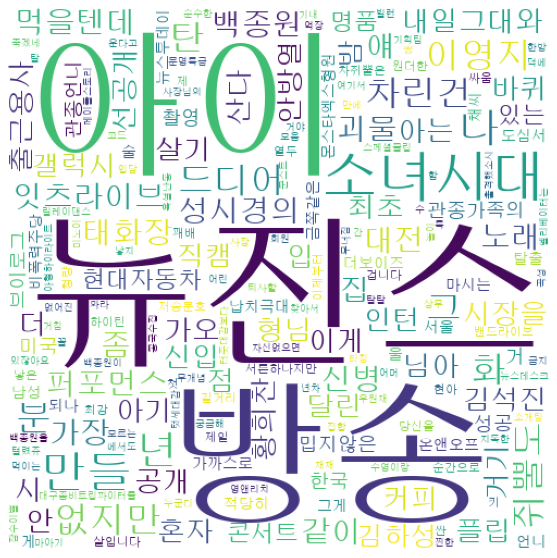

In [178]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### StopWord 설정 후 다시 보기

In [211]:
import pandas as pd

stopwords = pd.read_csv('C:/workspace/kaggle_youtube_hot/한국어 불용어.txt', header=None)
stop_words = set(stopwords[0])
stop_words

{'가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [216]:
words_dict = list(filter(lambda x: x not in stop_words, words))
words_dict

['더보이즈',
 '온앤오프',
 '비폭력주당',
 '채씨',
 '그게',
 '되나',
 '적당히',
 '술',
 '마시는',
 '게',
 '차린건',
 '쥐뿔도',
 '없지만',
 '이영지',
 '몬스타엑스형원',
 '서울',
 '도심서',
 '납치극대',
 '남성',
 '탈출',
 '뉴스투데이',
 '뉴진스',
 '금쪽같은',
 '울',
 '언니',
 '서른하나지만',
 '열두',
 '살입니다',
 '차린건',
 '쥐뿔도',
 '없지만',
 '이영지',
 '현아',
 '뉴진스',
 '당신을',
 '가장',
 '원더한',
 '순간으로',
 '제일',
 '싼',
 '집',
 '뉴진스',
 '뉴진스',
 '청량',
 '하이틴',
 '밴드라이브',
 '잇츠라이브',
 '방송',
 '낳은',
 '괴물',
 '이제부터',
 '차쥐뿔은',
 '겁니다',
 '차린건',
 '쥐뿔도',
 '없지만',
 '이영지',
 '키',
 '화',
 '저승문호',
 '첫',
 '패배',
 '길거리',
 '싸움',
 '최강',
 '대구좀비트립파이터를',
 '찾아서',
 '뉴진스',
 '자신없으면',
 '애',
 '낳지',
 '마아기',
 '운다고',
 '기내',
 '욕설난동',
 '뉴스데스크',
 '스페셜클립',
 '퍼포먼스',
 '뉴진스',
 '신병',
 '집합',
 '어머',
 '얘',
 '얘',
 '드디어',
 '재재',
 '수영이랑',
 '궁금해',
 '죽겠네',
 '함',
 '소녀시대',
 '노래',
 '여기서',
 '탈탈',
 '털렸쥬',
 '문명특급',
 '퇴사할',
 '거야',
 '성시경의',
 '먹을텐데',
 '대전',
 '태화장',
 '탄',
 '백종원',
 '무개념',
 '상무',
 '한방',
 '먹이는',
 '어린',
 '사장',
 '엘리베이터는',
 '탈',
 '수',
 '있잖아요',
 '내일그대와',
 '릴레이댄스',
 '뉴진스',
 '님아',
 '시장을',
 '가오',
 '곡성',
 '백종원이',
 '누군디',
 '백종원을',
 '모르는',
 '순수한',
 '사

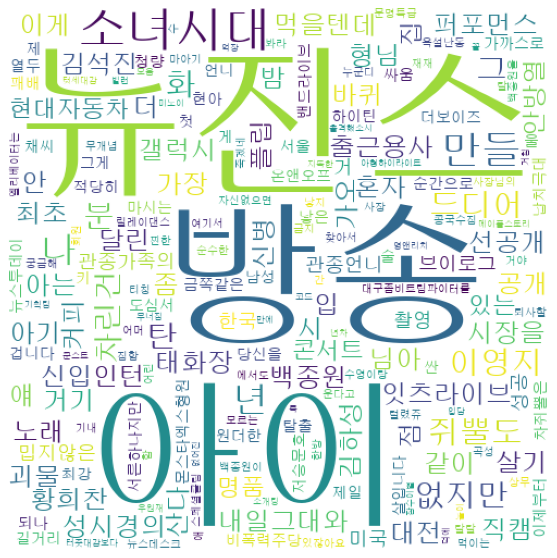

In [217]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

csv로 출력합니다

In [225]:
df_hot_top.to_excel("C:/workspace/kaggle_youtube_hot/KR_youtube_trending.xlsx", index=False, header=True, encoding="utf-8")
df.to_csv("C:/workspace/kaggle_youtube_hot/KR_youtube_trending_all.csv" , index = False, encoding = "utf-8")